# Research Angle

We are interested in understanding the content produced by The Daily Californian and The Stanford Daily in attempt to understand the discourse of both colleges. 

### What is our corpus and why?
The (somewhat unfair) assumption we are making is that the content produced by collegiate newspapers is representative of discussions across campus. In order to minimize the effects of this assumption, we put a lot of thought into what corpus we want to examine. The text we have collected includes both editorials (typically written and agreed upon by the editorial board of a newspaper) and opinion-editorials (typically written by staff writers or other community members/students outside of staff). 

Our decision to focus on opinionized articles reflects on our initial goal of understanding discourse on campus. News articles inform readers on what happened, whereas opinion articles reflect on what happened. Opinion articles, in that sense, are more telling of what events and issues are being discussed on campus. By including op-eds, we are trying to understand opinions beyond what the staff editorial believes as well. 

Furthermore, we restricted our corpus to articles published in 2017. We may change this, but we did this because we wanted a specific window to look at. 

### Why both Stanford Daily and Daily Californian? 
We want to examine both these publications because we are particularly interested in the similarity and dissimilarity between Berkeley and Stanford discourse. Our hope is that we can understand Berkeley discourse not only by its content but also by comparison. 

In [289]:
from datascience import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [290]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

# Metadata

In the following code, we will gather information on each article. The information we are obtaining is the school (Stanford or Berkeley), the url, the date the article was published, the headline of the article, and the content of the article

In [291]:
with open("data/daily_cal_corpus.txt") as f:
    dailyc = f.read()
    
with open("data/stanford-daily-corpus.txt") as f:
    sdaily = f.read()

calarticles = dailyc.split("\n\n\n")
stanarticles = sdaily.split("\n\n\n")

def create_metadata(article_lst, school):
    i = 1
    all_info = []
    for article in article_lst:
        article = article.strip().split("\n")
        url  = "Error"
        headline = "Error"
        content = ""
        for index in range(len(article)):
            if index == 0:
                url = article[index]
            elif index == 1:
                headline = article[index]
            else:
                content = content + article[index]
        if school == 'Stanford Daily':
            url = url[8:]
        if school == 'Daily Cal':
            url = url[7:]
        splitted = url.split('/')
        date = [splitted[2], splitted[3], splitted[1]]
        print(date)
        information = [school, url, date, headline, content]
        all_info.append(information)
    return all_info
        
        
stanford = create_metadata(stanarticles, 'Stanford Daily')
print()
print()
cal = create_metadata(calarticles, 'Daily Cal')

['11', '20', '2017']
['11', '20', '2017']
['11', '17', '2017']
['11', '15', '2017']
['11', '14', '2017']
['11', '14', '2017']
['11', '13', '2017']
['11', '08', '2017']
['11', '08', '2017']
['11', '07', '2017']
['11', '03', '2017']
['11', '02', '2017']
['10', '26', '2017']
['10', '24', '2017']
['10', '16', '2017']
['10', '09', '2017']
['10', '08', '2017']
['10', '06', '2017']
['09', '29', '2017']
['09', '29', '2017']
['09', '26', '2017']
['09', '14', '2017']
['09', '14', '2017']
['09', '08', '2017']
['09', '06', '2017']
['07', '11', '2017']
['06', '27', '2017']
['06', '21', '2017']
['06', '20', '2017']
['06', '11', '2017']
['06', '07', '2017']
['06', '02', '2017']
['06', '01', '2017']
['05', '31', '2017']
['05', '25', '2017']
['05', '24', '2017']
['05', '22', '2017']
['05', '17', '2017']
['05', '09', '2017']
['05', '09', '2017']
['05', '02', '2017']
['04', '14', '2017']
['04', '03', '2017']
['03', '14', '2017']
['03', '13', '2017']
['03', '07', '2017']
['03', '05', '2017']
['03', '03', 

In [292]:
def create_table(all_info):
    publication = make_array()
    links = make_array()
    dates = []
    headlines = make_array()
    content = make_array()
    for article in all_info:
        publication = np.append(publication, article[0])
        links = np.append(links, article[1])
        dates.append(article[2])
        headlines = np.append(headlines, article[3])
        content = np.append(content, article[4])
    return Table().with_columns('Publication', publication,
                               'Link', links, 'Date', dates,
                               'Headline', headlines, 'Content', content)

info_table = create_table(cal + stanford)
info_table

Publication,Link,Date,Headline,Content
Daily Cal,www.dailycal.org/2017/11/14/alta-bates-planned-closure-p ...,['11' '14' '2017'],Alta Bates planned closure puts Berkeley residents at risk,CITY AFFAIRS: Community members have mobilized recently ...
Daily Cal,www.dailycal.org/2017/11/07/berkeley-community-fight-stay/,['11' '07' '2017'],"Berkeley community here to fight, here to stay",NATIONAL ISSUES: A look at Berkeley one year after the N ...
Daily Cal,www.dailycal.org/2017/11/03/berkeley-mayor-must-explicit ...,['11' '03' '2017'],Berkeley mayor must explicitly call out racial disparity ...,CITY AFFAIRS: City Council punted on two major Berkeley ...
Daily Cal,www.dailycal.org/2017/10/31/event-policy-draft-use-impro ...,['10' '31' '2017'],Event policy draft could use improvement,CAMPUS ISSUES: Student organizations may suffer the cons ...
Daily Cal,www.dailycal.org/2017/10/27/history-visual-propaganda-no ...,['10' '27' '2017'],"History of visual propaganda, stereotypes should not be ...",CAMPUS ISSUES: A recent editorial cartoon stoked valid c ...
Daily Cal,www.dailycal.org/2017/10/24/current-climate-new-vice-cha ...,['10' '24' '2017'],"In current climate, new vice chancellor of equity and in ...","CAMPUS ISSUES: Oscar Dubón, Jr. will need a clearer visi ..."
Daily Cal,www.dailycal.org/2017/10/20/new-law-aiming-restrict-uc-c ...,['10' '20' '2017'],New law aiming to restrict UC campuses from giving enrol ...,UNIVERSITY ISSUES: California lawmakers should not waste ...
Daily Cal,www.dailycal.org/2017/10/17/berkeley-far-ready-next-big- ...,['10' '17' '2017'],Berkeley far from ready for next big hills fire,CITY AFFAIRS: As California grapples with wildfire month ...
Daily Cal,www.dailycal.org/2017/10/13/asuc-cannot-neglect-sexual-v ...,['10' '13' '2017'],ASUC cannot neglect sexual violence prevention commission,CAMPUS ISSUES: The ASUC Senate is supposed to approve th ...
Daily Cal,www.dailycal.org/2017/10/10/new-university-wisconsin-pol ...,['10' '10' '2017'],New University of Wisconsin policy hypocritically exploi ...,"NATIONAL ISSUES: The new policy comes amid a perceived "" ..."


# Classification 

Now that we have a table composed of the article content and the publication it was published for, we can begin to test whether there is a difference. The way we are looking to do this is through classification. We will train our model on half of the table, telling which content maps with which publication. Then, we will use that model to test the other half and see how our model does. 

In [293]:
content = info_table.column('Content')
publication = info_table.column('Publication')

Right now, we have an array of content and an array of their corresponding publication. Now we would like to see if the publication has any dependency on the publication. 

In [294]:
from sklearn.utils import shuffle

np.random.seed(1)

x, y = shuffle(content, publication, random_state=0)

In [295]:
x[0], y[0]

('By any objective standard, my career as an NCAA Division I athlete was unremarkable. An undersized walk-on defensive end to the Stanford Cardinal in the fall of 2004, I toiled on the practice squad for three years before breaking a few bones and deciding to move on with my life. When I made the hard decision to quit, I went to see our coach, Jim Harbaugh. He listened to my reasons and then, as though I were weighing the pros and cons of playing for the first time, said, “You know, football builds character.”He was right.Football had a huge impact on my life. An only child, it gave me a sense of belonging. A husky kid — \u200ato use a charitable term coined by Levi’s Jeans and lovingly employed by my mother — \u200ait made me feel valuable for my large size.I began to play the game when I was 12 years old. It scared me at first. It was violent and left no room for excuses. As a player, you quickly learn that hesitation and weakness will be punished. Eleven players mutually responsible

In [296]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf', LogisticRegression(random_state=0, penalty='l2', C=1000))
                     ])

scores = cross_val_score(text_clf, x, y, cv=5)

print(scores, np.mean(scores))

[ 0.96875     0.96666667  0.96666667  0.96666667  0.96666667] 0.967083333333


In [297]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

# get tfidf values
tfidf = TfidfVectorizer()
tfidf.fit(x)
x_train = tfidf.transform(x_train)
x_test = tfidf.transform(x_test)

# build and test logit
logit_class = LogisticRegression(random_state=0, penalty='l2', C=1000)
model = logit_class.fit(x_train, y_train)
model.score(x_test, y_test)

0.967741935483871

Wow! Our model scored pretty high. But before getting too excited, we decided to check, what were common feature names that our model used to distinguish between Berkeley and Stanford articles.

In [298]:
feature_names = tfidf.get_feature_names()
top20stanford = np.argsort(model.coef_[0])[-20:]
print("Top features for Stanford reviews:")
print(list(feature_names[j] for j in top20stanford))
print()
print("Top features for Berkeley reviews:")
top20cal = np.argsort(model.coef_[0])[:20]
print(list(feature_names[j] for j in top20cal))

Top features for Stanford reviews:
['paris', 'edith', 'theme', 'you', 'we', 'in', 'that', 'our', 'me', 'is', 'of', 'american', 'agreement', 'postdocs', 'indigenous', 'path', 'dgen', 'my', 'and', 'stanford']

Top features for Berkeley reviews:
['berkeley', 'uc', 'campus', 'opinion', 'city', 'students', 'asuc', 'chancellor', 'board', 'editorial', 'state', 'editor', 'yiannopoulos', 'pride', 'represent', 'christ', 'written', 'cal', 'majority', 'editorials']


In [299]:
topstanford = np.argsort(model.coef_[0])[-1:]
print("Top feature for Stanford reviews:")
print(list(feature_names[j] for j in topstanford))
print()
print("Top feature for Berkeley reviews:")
topcal = np.argsort(model.coef_[0])[:1]
print(list(feature_names[j] for j in topcal))

Top feature for Stanford reviews:
['stanford']

Top feature for Berkeley reviews:
['berkeley']


Now we see that the classifier's most prominent distinguisher between Daily Cal and Stanford Daily articles is "berkeley" and "stanford". Well, that feels like cheating! We decided to replace "berkeley" and "stanford" with "college" to test our model more thoroughly.

In [318]:
def test_classifier_model(con, pub): 
    np.random.seed(1)
    x, y = shuffle(con, pub, random_state=0)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

    # get tfidf values
    tfidf = TfidfVectorizer()
    tfidf.fit(x)
    x_train = tfidf.transform(x_train)
    x_test = tfidf.transform(x_test)

    # build and test logit
    logit_class = LogisticRegression(random_state=0, penalty='l2', C=1000)
    model = logit_class.fit(x_train, y_train)
    feature_names = tfidf.get_feature_names()
    
    print("Classifier model score: ", model.score(x_test, y_test))
    print()
    
    print("Top features for Stanford articles:")
    top20stanford = np.argsort(model.coef_[0])[-20:]
    top_stanford_feats = list(feature_names[j] for j in top20stanford)
    top_stanford_values = list(model.coef_[0][j] for j in top20stanford) 
    print(top_stanford_feats)
    top_stanford = Table().with_columns('Stanford Feature Words', top_stanford_feats, 'Values', top_stanford_values).sort('Values', descending = True)
    top_stanford.barh('Stanford Feature Words', 'Values')
    
    print()
    
    print("Top features for Berkeley articles:")
    top20cal = np.argsort(model.coef_[0])[:20] # list of indices (respective of feature_names) with top feature words for Daily Cal
    top_cal_feats = list(feature_names[j] for j in top20cal)
    top_cal_values = list(model.coef_[0][j] for j in top20cal) 
    print(top_cal_feats)
    
    scaling = np.sum(np.abs(model.coef_[0]))
    top_cal = Table().with_columns('Berkeley Feature Words', top_cal_feats, 'Values', np.abs(top_cal_values)).sort('Values', descending = True)
    top_cal.barh('Berkeley Feature Words')
    print()
    
    #nuetral_words = (np.argsort(np.abs(model.coef_[0])))[:20]
    nuetral_words_indices = (np.argsort(np.abs(model.coef_[0])))
    nuetral_words_values = np.sort((np.abs(model.coef_[0])))
    val = 0
    index = 0
    nuetral_words = []
    while val == 0:
        nuetral_words.append(feature_names[nuetral_words_indices[index]])
        index += 1
        val = nuetral_words_values[index]
    print("There are ", len(nuetral_words), " nuetral words. Here are the first 25: " )
    print(nuetral_words[:25])
        
    #print(list(feature_names[j] for j in nuetral_words))
 
    
    print()
   
    
    
    """
    FOR DETERMINING WHICH ARTICLES WERE CLASSIFIED INCORRECTLY
    index = 0
    misclassifiedIndexes = []
    for label, predict in zip(y_test, pub):
        if label != predict: 
            misclassifiedIndexes.append(index)
        index +=1
    
    for index in misclassifiedIndexes:
        print()
        print("WRONG: ", con[index])
        print("Classified as ", y_test[index], " but actually ", publication[index])
        print()
        
        
    plt.figure(figsize=(20,4))
    for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
     plt.subplot(1, 5, plotIndex + 1)
     plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
     plt.title(‘Predicted: {}, Actual: {}’.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)
        """
    
    return 

In [319]:
def replace_word(arr, old, new):
    new_arr = make_array()
    for elem in arr:
        new_arr = np.append(new_arr, elem.lower().replace(old, new))
    return new_arr

In [320]:
content = replace_word(content, 'berkeley', 'college')
content = replace_word(content, 'stanford', 'college')
content = replace_word(content, 'uc', '') #also replacing 'UC' which is associated with 'UC' Berkeley
content = replace_word(content, 'cal', 'college')

Classifier model score:  0.903225806452

Top features for Stanford articles:
['workers', 'these', 'you', 'american', 'our', 'agreement', 'football', 'is', 'díaz', 'me', 'spencer', 'we', 'indigenous', 'of', 'postdocs', 'dgen', 'that', 'path', 'my', 'and']

Top features for Berkeley articles:
['campus', 'opinion', 'city', 'students', 'chancellor', 'board', 'yiannopoulos', 'editorial', 'state', 'christ', 'editor', 'represent', 'written', 'editorials', 'majority', 'police', 'as', 'candidates', 'homeless', 'pride']

There are  1144  nuetral words. Here are the first 25: 
['burst', 'repeated', 'lung', 'lowering', 'lowell', 'speed', 'counterfactuals', 'macro', 'spends', 'loud', 'coupa', 'spiders', 'courting', 'logic', 'sporadic', 'louder', 'sportswear', 'spearhead', 'magic', 'marks', 'repeating', 'sonnet', 'corners', 'manpower', 'mankind']



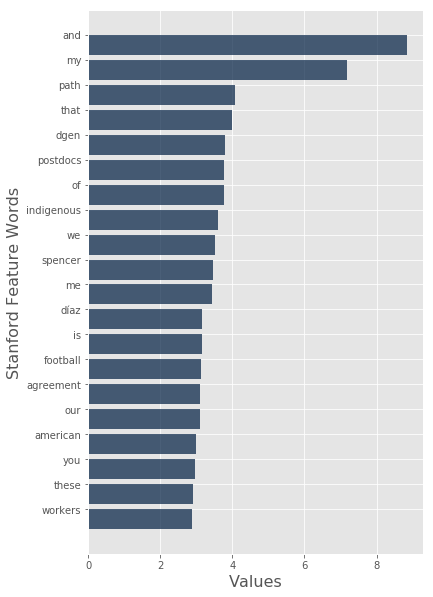

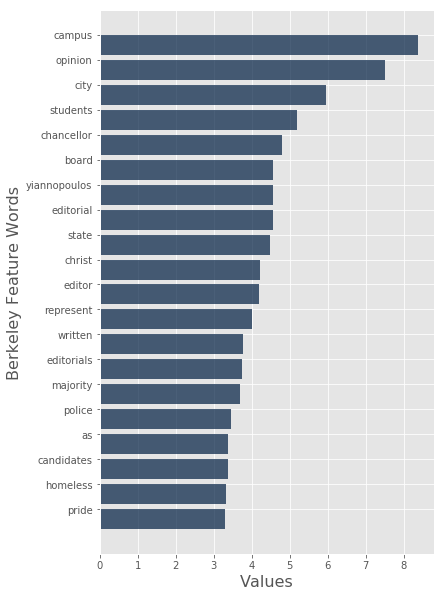

In [321]:
test_classifier_model(content, publication)

### Just out of curiousity... 
We also tried out model just the headlines of the articles (not the content), and we see that the classifier did significantly poorer with just the headline information. Although the key features of the headlines model are quite revealing of content of the articles.  

Classifier model score:  0.709677419355

Top features for Stanford articles:
['order', 'voces', 'secreto', 'is', 'we', 'removed', 'incapacity', 'or', 'impeached', 'reform', 'countering', 'hateful', 'why', 'stolen', 'and', 'storytelling', 'board', 'editorial', 'letter', 'the']

Top features for Berkeley articles:
['must', 'christ', 'carol', 'campus', 'not', 'referendum', 'vote', 'for', 'no', 'state', 'vice', 'as', 'students', 'yes', 'student', 'policy', 'free', 'protests', 'vigilant', 'guardians']

There are  107  nuetral words. Here are the first 25: 
['general', 'dark', 'michael', 'understanding', 'role', 'form', 'tendencies', 'root', 'gould', 'tapping', 'tap', 'takes', 'business', 'venezuela', 'russia', 'most', 'mourning', 'ben', 'behalf', 'involves', 'real', 'small', 'intolerance', 'neglected', 'staff']



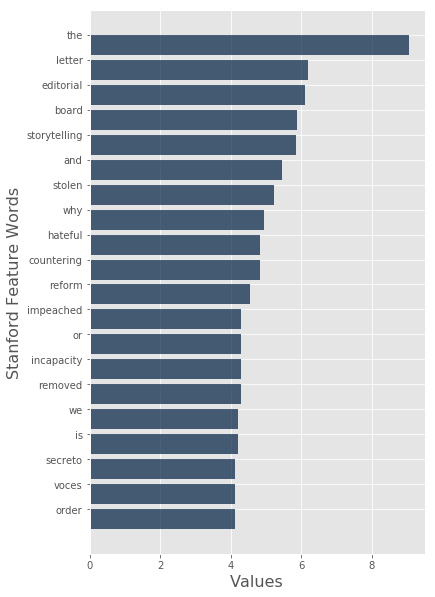

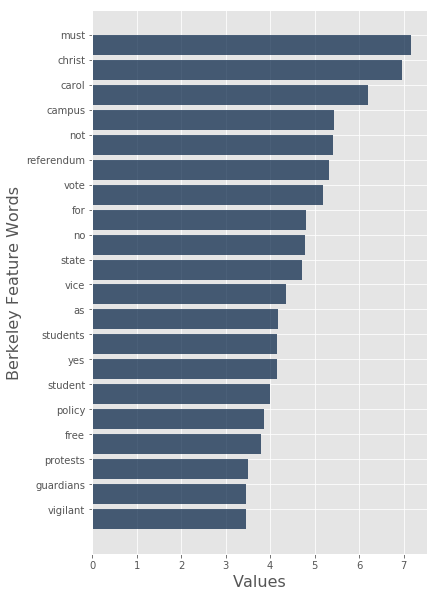

In [322]:
headlines = info_table.column('Headline')
headlines = replace_word(headlines, 'berkeley', 'college')
headlines = replace_word(headlines, 'stanford', 'college')
headlines = replace_word(headlines, 'uc', '') #also replacing 'UC' which is associated with 'UC' Berkeley
headlines = replace_word(headlines, 'cal', 'college')
test_classifier_model(headlines, publication)

# Classification Results 
Even by replacing 'berkeley', 'stanford', 'cal', and 'uc', our model scores very high (about 90 percent)! Even just looking at the headlines gave us a fairly high rate (about 71 percent). 

This gives us reason to believe that the content Daily Cal covers v. the content Stanford Daily covers is quite different. 

### Some points of interest 
Just by glancing at some of the differences in top features words, we get a little bit of an idea of how the two publication's content differs. 
1. Some of the key words are perhaps telling of culture: Berkeley articles' feature words include "police", "homeless", "pride". Stanford articles' feature words include "workers", "american", "football".
2. Other keywords refer to speakers. For Berkeley, there was a lot of buzz around Milo Yiannopoulos coming. Whereas for Stanford, there was a lot of conversation on Robert Spencer coming.
3. Some of the keywords seem like obviously specific differences. For example, Berkeley has "christ" as a top feature word, referring to our new chancellor. Stanford has "dgen" as a top feature word, referring to Stanford's Diversity and First-Generation program.   

In the next steps, we will further explore how the content is different. 

### Potential next steps

#### Examining political leaning through Word embedding 

1. Daily Cal often accused of being a left-leaning organization. Can we examine this statement? How does its leaning compare with Stanford Daily?

2. Similar to he/she gender binary we had looked at in class, we would have our two polar ends be conservative v. liberal

3. Problem: How do we differentiate in words between conservative and liberal through keywords? (In our gender analysis, we used "he" and "she")

#### Examining political leaning through Dictionary Method 

1. Do Daily Cal language and dialogue align more with left than right? 

2. Problem: Does a bias-checker dictionary exist? Is it accurate/fair? 

#### Textual Clustering  within publication 

1. How does one piece of Daily Cal content compare with the rest?  

2. Are there any outliers? Is there a clear pattern? What would this pattern tell us? 

#### Time analysis using Textual Clustering 

1. Start by representing every article as a vector. Using multidimensionality reduction, we can visually see how the content differs from each other. Is proximity of articles related to the time it was published (gathered metadata)?     